In [49]:
import pandas as pd
import numpy as np

In [50]:
data=pd.read_csv('data.csv')

In [51]:
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [52]:
data["Label"].sum()

1872

In [53]:
data=data.drop(['URLs'],axis=1)

In [54]:
data.isnull().any()

Headline    False
Body         True
Label       False
dtype: bool

In [55]:
data=data.dropna()

In [56]:
data.head()

,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [66]:
x=data.iloc[:,:-1].values
y=data['Label']

In [69]:
x[0]

array(['Four ways Bob Corker skewered Donald Trump',
       'Image copyright Getty Images\nOn Sunday morning, Donald Trump went off on a Twitter tirade against a member of his own party.\nThis, in itself, isn\'t exactly huge news. It\'s far from the first time the president has turned his rhetorical cannons on his own ranks.\nThis time, however, his attacks were particularly biting and personal. He essentially called Tennessee Senator Bob Corker, the chair of the powerful Senate Foreign Relations Committee, a coward for not running for re-election.\nHe said Mr Corker "begged" for the president\'s endorsement, which he refused to give. He wrongly claimed that Mr Corker\'s support of the Iranian nuclear agreement was his only political accomplishment.\nUnlike some of his colleagues, Mr Corker - free from having to worry about his immediate political future - didn\'t hold his tongue.\nSkip Twitter post by @SenBobCorker It\'s a shame the White House has become an adult day care center. Som

In [64]:
y[0]

1

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [74]:
cv=CountVectorizer(max_features=5000)
m_b=cv.fit_transform(x[:,1]).todense()

In [75]:
m_b

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 2, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
ccv=CountVectorizer(max_features=5000)
m_h=cv.fit_transform(x[:,0]).todense()

In [77]:
m_h

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [80]:
x_mat=np.hstack((m_h,m_b))

In [81]:
x_mat

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
model=ExtraTreesClassifier()
model.fit(x_mat,y)
model.feature_importances_

array([4.90651286e-05, 8.58625595e-06, 0.00000000e+00, ...,
       6.90709083e-05, 1.47335264e-05, 1.52283955e-04])

In [85]:
import matplotlib .pyplot as plt

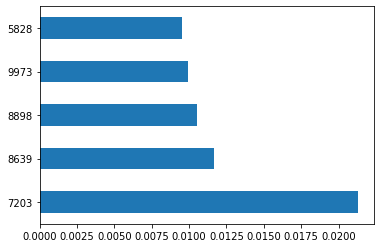

In [86]:
fet=pd.Series(model.feature_importances_)
fet.nlargest(5).plot(kind='barh')
plt.show()

In [87]:
import sklearn

In [88]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_mat, y, test_size = 0.1)
print(x_train,y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 3474    1
948     1
1050    1
1149    0
2079    0
       ..
1843    1
805     1
1094    0
2862    0
1982    0
Name: Label, Length: 3589, dtype: int64


In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
cls1=DecisionTreeClassifier()
cls1.fit(x_train,y_train)

pre1=cls1.predict(x_test)

In [91]:
pre1

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [92]:
y_test

1151    1
3346    0
2692    0
29      1
160     0
       ..
2182    0
3575    0
3228    1
1305    0
1287    1
Name: Label, Length: 399, dtype: int64

In [94]:
print(sklearn.metrics.accuracy_score(y_test,pre1))
print(sklearn.metrics.classification_report(y_test,pre1))

0.9573934837092731
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       197
           1       0.99      0.93      0.96       202

    accuracy                           0.96       399
   macro avg       0.96      0.96      0.96       399
weighted avg       0.96      0.96      0.96       399



In [95]:
print(sklearn.metrics.confusion_matrix(y_test,pre1))

[[195   2]
 [ 15 187]]


In [96]:
from sklearn import tree

[Text(257.39793457031254, 211.04470588235293, 'X[8898] <= 1.5\ngini = 0.497\nsamples = 3589\nvalue = [1923, 1666]'),
 Text(203.01336914062503, 198.25411764705882, 'X[7203] <= 0.5\ngini = 0.385\nsamples = 2304\nvalue = [1705, 599]'),
 Text(138.18673828125003, 185.4635294117647, 'X[7261] <= 1.5\ngini = 0.48\nsamples = 1490\nvalue = [893, 597]'),
 Text(53.35875000000001, 172.6729411764706, 'X[9490] <= 1.5\ngini = 0.278\nsamples = 702\nvalue = [585, 117]'),
 Text(35.572500000000005, 159.88235294117646, 'X[7090] <= 0.5\ngini = 0.124\nsamples = 604\nvalue = [564, 40]'),
 Text(25.110000000000003, 147.09176470588235, 'X[8088] <= 0.5\ngini = 0.078\nsamples = 587\nvalue = [563, 24]'),
 Text(16.740000000000002, 134.30117647058825, 'X[5233] <= 0.5\ngini = 0.041\nsamples = 571\nvalue = [559, 12]'),
 Text(12.555000000000001, 121.51058823529411, 'X[9553] <= 1.5\ngini = 0.021\nsamples = 565\nvalue = [559, 6]'),
 Text(8.370000000000001, 108.72, 'X[5434] <= 0.5\ngini = 0.007\nsamples = 561\nvalue = [559

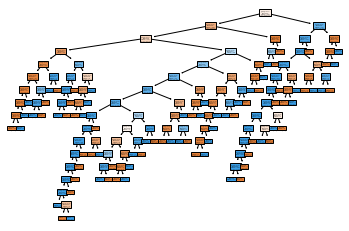

In [97]:
tree.plot_tree(cls1,filled=True)

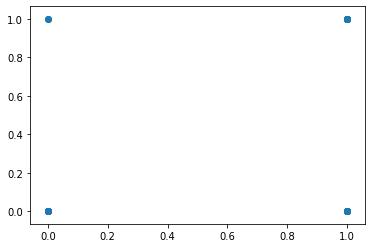

In [99]:
plt.scatter(y_test,pre1)